# 同花顺行业概念信息

In [1]:

import pandas as pd
# https://zhuanlan.zhihu.com/p/508035138/

fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xls'
thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')

## 查询信息

In [2]:
thsgn[:1]
thsgn.columns
thsgn.loc['300474.SZ']

股票简称                                                                  景嘉微
现价(元)                                                               71.42
涨跌幅(%)                                                               1.13
主营产品名称                  图形显控领域产品||小型专用化雷达领域产品||小型专业化雷达||图形显控模块产品||加固类产...
所属概念                    AI芯片;军民融合;雷达;深股通;人工智能;芯片设计;芯片概念;集成电路概念;军工;超清视频...
所属同花顺行业                                                    国防军工-国防军工-军工电子
经营范围                    电子产品（不含电子出版物）、计算机软件的研究、开发、生产和销售及其相关的技术服务，集成电路设...
公司网站                                                 www.jingjiamicro.com
所属概念数量(个)                                                              20
a股流通市值 (元)2023.12.21                                          23489696000
Name: 300474.SZ, dtype: object

# Debug开启

In [3]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

nb not handlers
nb: <ipykernel.iostream.OutStream object at 0x00000236DD6B0250>


# TDX多日数据分析

## 定义 TDX-Path

In [4]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [5]:
sys.path.append("../../")
import os

import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

os.environ['NUMEXPR_MAX_THREADS'] = '12'

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [6]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

### 功能定义

In [7]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df


def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def show_tdx_data(df, codelist=None, market_value='3', col=None):

    columns_ = [
        "name", "category", "close", "percent",'volra', 'topR', "lastp1d", "ma5dcum",
        "ma20d", "fib", "fibl", "ra", "ral", "df2", "per1d", "hmax", "lmin",
        "per%sd" % (market_value),
        "perc%sd" % (market_value)]
    if isinstance(df, pd.Series):
        columns_ = [co for co in columns_ if co in df.index]
    else:
        columns_ = [co for co in columns_ if co in df.columns]
    if col is not None:
        columns_.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            # print("Count:1")
            temp = df.loc[columns_]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, columns_]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], columns_]
    return temp


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col))
                & (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    # for i in top5.keys():
    #     # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    #     # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    #     print(i, (topSort[i]))

    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df = df.fillna(0)
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df


def get_realtime_ratio(df, market='all'):
    if 'ratio' in df.columns:
        df.drop('ratio', axis=1, inplace=True)
    ratio_df = tdd.getSinaJsondf(market)
    df = cct.combine_dataFrame(
        df, ratio_df.ratio, col=None, compare=None, append=False, clean=False)
    return df


def get_ths_info(code):
    code = cct.code_to_symbol_ths(code)
    return thsgn.loc[code]

### 还原Cell输出信息

In [8]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [9]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")

df = get_realtime_ratio(df)
# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol
df.ratio[-2:]

['/low_3d_200_y_all', '/low_d_60_y_all']


(4446, 190)

code
300407    2.6
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

code
000630    1.5
300407    2.8
Name: ratio, dtype: float64

### test InStock

In [10]:
df.columns

Index(['lopen', 'lhigh', 'llow', 'lastp', 'lvol', 'lamount', 'ma5d', 'ma10d',
       'ma20d', 'truer',
       ...
       'lv', 'date', 'lowvol', 'last6vol', 'category', 'timel', 'close',
       'name', 'ratio', 'percent'],
      dtype='object', length=190)

## 个股数据查看

In [11]:
df.ma203d[:1]
# df.loc['003042'].loc[["category", "close"]]

code
301171    18.94
Name: ma203d, dtype: float64

In [12]:
show_tdx_data(df.loc['003042'])
get_ths_info('003042')

name                  中农联合
category    新股与次新股 ;核准制次新股
close                16.35
percent                2.2
topR                    -1
lastp1d               16.0
ma5dcum               17.3
ma20d                17.94
fib                      0
fibl                     6
ra                       0
ral                  -18.4
df2                     17
per1d                  1.4
hmax                 21.15
lmin                  14.3
per3d                  3.6
perc3d                 0.1
Name: 003042, dtype: object

股票简称                                                                 中农联合
现价(元)                                                               20.42
涨跌幅(%)                                                               2.67
主营产品名称                  吡虫啉||啶虫脒||烯啶虫胺||哒螨灵||低毒农药原药及其中间体||杀虫剂||杀菌剂||除草...
所属概念                                                  草甘膦;乡村振兴;中俄贸易概念;供销社
所属同花顺行业                                                      基础化工-化学制品-农药
经营范围                    生物、化学农药、化工产品及仪器仪表的技术开发、技术转让、技术咨询服务；农药（不含化学危险品）...
公司网站                                                       www.sdznlh.com
所属概念数量(个)                                                               4
a股流通市值 (元)2023.12.21                                           1390841800
Name: 003042.SZ, dtype: object

In [13]:
# df[(df.close > df.ma20d * 0.99) & (df.close < df.ma20d * 1.05)]

def filter_ma_range_df(df, ma='20', days='3'):
    dd = []
    for da in range(int(days), 0, -1):
        # print(da, ma)
        # df1 = df[ (df['lastp%sd'%(da)] > df['ma%s%sd'%(ma,da)]) & (df['lastp%sd'%(days)] < df['ma%s%sd'%(ma,da)] * 1.1)]
        df1 = df[(df['lastp%sd' % (da)] > df['ma%s%sd' % (ma, da)] * 0.99)]
        if da == days:
            dd = df1.index.tolist()
        else:
            dd = [x for x in dd if x in df1.index]

    return [x for x in set(dd)]


def get_union_list(maind, subd):
    # 筛选Main存在后切在新Sub出现
    return [x for x in maind if x in subd]

### 新农联合筛选

In [14]:
code_fs = '003042'
# show_tdx_data(df.loc['003042'])
# get_ths_info('003042')

df_f_t = df[(df.fib < 30) & (df.fibl > 6) & (df.df2 > 2) & (df.ral < -15) &
            (df.close >= df.ma5dcum) & (df.perc3d > 1.1) & (df.lastv1d > df.lastv2d) & (df.close > df.ma5d) ]

df_f_t.shape
# df_f_t.loc[code_fs][:1]
show_tdx_data(df_f_t)[:5]


(2, 190)

Count:2 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
002713,东易日盛,智能家居;智能物流;O2O概念,6.50,-10.0,0,7.22,5.9,6.22,0,9,1,-21.8,6,10.1,7.52,4.90,0.0,47.8
300471,厚普股份,天然气;LNG动力船;页岩气,12.61,5.2,2,11.99,10.5,11.45,0,7,0,-17.4,12,20.0,14.40,7.06,25.2,14.7


#### 写入069

In [15]:
# write_code_to_blk(df_f_t.index, '069')

In [16]:
df_ma26d = filter_ma_range_df(df, ma=20, days=5)
# 连续3日在生命线上
# df_ma26d = df[(df.fibl > 1) & (df.ra > 5)]
len(df_ma26d)
df_ma5d = filter_ma_range_df(df, ma=5, days=5)

# 连续3日在生命线上
len(df_ma5d)
df_x = get_union_list(df_ma26d, df_ma5d)
df_5dx_20d = get_union_list(df_x, df[df.ma5d < df.ma20d].index)

show_tdx_data(df.loc[df_5dx_20d])

574

2935

Count:0 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,


In [17]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

,date,name,category,percent,close,lastp1d,ma5d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,
603068,2024-02-07,博通集成,新股与次新股,3.1,21.57,20.92,20.05,22.6,24.59,0,7,17,5.3,32.30,15.79,0,-32.5,804.8,30,-66.7,3362998.0,1175400.0,14895999.0,5846041.6,8.4,2.5,1.3
601377,2024-02-02,兴业证券,参股新三板;MSCI概念;融资,0.7,5.85,5.81,5.73,5.6,5.67,0,7,5,1.8,6.21,5.08,0,-10.2,986.7,26,-68.4,61390879.0,25984244.0,67332201.0,113394217.1,0.0,0.0,1.3
000725,2024-01-23,京东方Ａ,国开行;物联网;OLED,3.0,4.11,3.99,3.96,3.8,3.79,0,12,3,2.3,3.99,3.53,0,-6.6,548.8,25,-60.1,384614846.0,179124854.0,629925036.0,662755523.0,5.3,0.0,1.3


In [18]:

sort_key2 = "per%sd" % (market_value)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
show_tdx_data(df)[: 5]

show_tdx_data(df)[-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

Count:4446 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
301138,华研精机,融资融券 ;转融券标的 ;智能,30.81,-8.9,1,33.82,22.9,25.41,0,7,1,-24.5,16,-6.4,30.50,14.02,0.0,87.5
601127,赛力斯,沪股通;新能源汽车;无人驾驶,92.30,0.4,0,91.93,66.9,72.86,0,7,2,94.4,67,10.0,91.99,54.60,0.0,77.2
002611,东方精工,军工;机器人概念;军民融合,8.00,10.0,2,7.27,4.8,4.93,0,7,2,25.6,6,10.0,5.79,3.59,20.0,73.2
600640,国脉文化,在线旅游;阿里巴巴概念;O2O,15.20,-9.3,4,16.76,10.6,11.55,0,6,3,50.4,11,-10.0,14.25,7.66,0.0,70.8
301318,维海德,融资融券 ;转融券标的 ;注册,57.40,-6.7,4,61.52,29.9,33.52,0,7,4,66.1,20,2.3,37.07,16.57,0.0,66.1


Count:4446 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
600767,退市运盛,ST板块;智能医疗;股权转让,0.42,-89.9,-2,4.16,5.5,5.49,0,1,0,-29.3,5,-14.2,6.20,5.00,0.0,-3.3
600275,退市昌鱼,ST板块;涉矿;金属镍,0.41,-80.3,-2,2.08,2.6,2.69,0,1,0,-39.4,2,-5.0,3.05,2.49,0.0,-3.3
600077,*ST宋都,舟山新区;G20峰会;融资融券,0.41,-59.0,-7,1.00,2.1,2.17,0,1,0,-70.2,1,-4.8,2.80,1.39,0.0,-3.3
603555,ST贵人,手机游戏;体育产业;参股保险,0.82,-18.8,-2,1.01,1.5,1.53,0,1,0,-47.9,1,-9.8,1.81,1.29,0.0,-3.3
600532,退市未来,蜱虫;网络游戏;股权转让,0.72,10.8,-11,0.65,7.7,9.04,0,1,0,-97.5,9,-80.5,13.99,4.56,-69.7,-3.3


## filter 20D 涨幅榜 

In [19]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98)
           & (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
show_tdx_data(f20df)[: 3]
show_tdx_data(f20df)[-3:]

(262, 190)

Count:262 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
601127,赛力斯,沪股通;新能源汽车;无人驾驶,92.30,0.4,0,91.93,66.9,72.86,0,7,2,94.4,67,10.0,91.99,54.60,0.0,77.2
002611,东方精工,军工;机器人概念;军民融合,8.00,10.0,2,7.27,4.8,4.93,0,7,2,25.6,6,10.0,5.79,3.59,20.0,73.2
600661,昂立教育,二胎概念;央企国资改革;高考,12.26,-4.2,2,12.80,9.1,9.97,0,7,2,32.8,7,4.5,15.09,5.99,0.0,57.1


Count:262 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
601880,辽港股份,一带一路;环渤海;东北亚经贸中,1.46,-1.4,0,1.48,1.4,1.44,0,6,0,-7.5,1,0.7,1.55,1.30,0.0,0.0
002911,佛燃能源,天然气;新股与次新股,12.38,0.5,0,12.32,11.7,11.69,0,7,1,-8.0,11,3.0,12.51,10.52,0.0,0.0
600258,首旅酒店,O2O概念;北京环球影城;情人,15.12,-1.0,0,15.28,15.0,15.27,0,7,0,-29.2,15,2.6,17.47,13.21,0.0,-1.1


In [20]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
show_tdx_data(f20df)[: 5]

show_tdx_data(f20df)[-5:]


# df.loc[:, ["name"]].T

(262, 190)

Count:262 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
301020,密封科技,地方国资改革 ;融资融券 ;转,21.55,20.0,1,17.96,16.8,18.28,0,7,0,-24.4,13,20.0,24.46,11.09,40.0,24.6
300757,罗博特科,新股与次新股 ;光伏概念 ;工,94.20,15.0,1,81.89,63.2,69.26,0,5,0,-14.3,49,20.8,86.00,39.63,35.8,37.4
300731,科创新源,橡胶;新股与次新股,18.74,11.2,0,16.86,15.8,17.36,0,6,0,-29.1,11,20.0,23.66,8.41,31.2,22.3
300735,光弘科技,5G;新股与次新股;汽车电子,22.46,8.1,0,20.77,17.9,19.59,0,7,0,81.6,20,20.0,25.30,13.81,28.1,24.3
300152,新动力,节能环保;脱硫脱硝;固废处理,3.55,7.9,0,3.29,2.5,2.67,0,6,0,8.2,2,20.1,3.21,1.35,28.0,35.8


Count:262 190


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
600717,天津港,一带一路;央视财经50;滨海新,4.25,-0.5,0,4.27,4.1,4.16,0,10,0,-9.0,4,0.7,4.33,3.78,0.0,0.1
601880,辽港股份,一带一路;环渤海;东北亚经贸中,1.46,-1.4,0,1.48,1.4,1.44,0,6,0,-7.5,1,0.7,1.55,1.30,0.0,0.0
002911,佛燃能源,天然气;新股与次新股,12.38,0.5,0,12.32,11.7,11.69,0,7,1,-8.0,11,3.0,12.51,10.52,0.0,0.0
600258,首旅酒店,O2O概念;北京环球影城;情人,15.12,-1.0,0,15.28,15.0,15.27,0,7,0,-29.2,15,2.6,17.47,13.21,0.0,-1.1
002077,大港股份,地方国资改革;新能源;引力波,15.13,1.2,0,14.95,14.4,14.76,0,6,0,-13.0,15,-1.5,17.87,11.64,-0.3,2.6


In [21]:
# code = ["000725"]
# f20df.loc[code,
#           ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
#            "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
#            (market_value),
#               "perc%sd" % (market_value)]]

## Write code to blk 

In [22]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

In [23]:
# code = '002670'
# tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# tdf.dropna(inplace=True)
# tdf.loc[:, ["close", "ma5d", "ma10d",
#             "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
# tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [24]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_20']
G:\sina_MultiIndex_data.h5


(2911688, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2024-03-01 09:29:24,1690.0,1690.0,1690.0,1695.0,33500,1690.0
2024-03-01 09:30:40,1685.0,1690.0,1685.0,1695.0,77300,1690.0


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2024-03-01 15:00:00,1685.06,1694.97,1676.68,1695.0,2686796,1687.15


## Now freq = 'D' 总量占比

In [25]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

33401.217818004996

ticktime
2024-03-02    0.867651
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4897 entries, ('000001', Timestamp('2024-03-02 00:00:00', freq='D')) to ('689009', Timestamp('2024-03-02 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4897 non-null   float64
 1   volume  4897 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 258.3+ KB


,close,volume
count,4897.000000,4.897000e+03
mean,17.553427,6.820751e+09
std,33.488118,1.246232e+10
min,0.000000,0.000000e+00
25%,5.780136,1.334620e+09
50%,10.553027,3.130889e+09
75%,19.776207,7.213107e+09
max,1685.993850,2.294595e+11


### TDX filter Vol and fibl

####  9日交易量nvol_idx 

In [26]:
# 9日交易量Mean
temp = df[df.columns[((df.columns >= 'lastv1d') & (df.columns <= 'lastv9d'))]]
temp.shape, temp.columns
temp['volmean'] = temp.mean(axis=1)
# temp[:1]
temp['volnow'] = round(temp['lastv1d'] / temp['volmean'], 2)
nvol_idx = temp.sort_values(by=['volnow'], ascending=[0])
# nvol_idx.index
nvol_idx.loc[:, ['volnow']].T[:20]
df = get_realtime_ratio(df)

show_tdx_data(df, nvol_idx.index[:20], col='ratio').T
nvol_idx.shape

((4446, 9),
 Index(['lastv1d', 'lastv2d', 'lastv3d', 'lastv4d', 'lastv5d', 'lastv6d',
        'lastv7d', 'lastv8d', 'lastv9d'],
       dtype='object'))

code,600532,600375,002611,601326,002313,600302,603920,002713,600127,000628,002481,300239,600666,601798,300965,601258,300757,603163,605151,600270,603023,002975,300152,002317,002639,600432,600191,300471,300801,603825,603880,300739,300799,300950,301138,002052,600240,601990,300613,002157,603960,002681,603776,301163,601921,300399,000998,603856,300766,300319,003037,600475,600860,002496,002009,000049,002564,000004,001225,300423,600369,300338,000561,603895,600766,600260,603661,002656,603042,600421,002685,300435,603933,600338,002510,603196,600074,300293,600081,600313,600466,301106,002166,002673,000938,603019,600571,300010,002251,002825,600373,601298,600306,000635,002049,603488,002403,600640,002316,002682,000801,002077,000810,002366,002644,002554,301022,300278,300427,600589,000670,600226,000996,002248,603011,301338,600806,603036,300116,300576,600540,603815,002800,301107,000733,600619,300540,600579,002795,002130,603173,002520,301029,300236,300027,603111,000063,600393,002041,002535,002485,601608,002553,600446,603555,000045,300159,300731,000586,600654,000656,002951,600960,002931,002989,300256,600685,002136,603813,600175,300210,000546,000657,002977,600516,002204,000415,603255,603958,000790,300157,300370,002665,002701,600481,000691,603516,600647,301318,600317,002005,300637,600616,002470,002889,002102,002427,002482,600759,600774,300862,600120,603363,600892,300346,603260,002406,603030,600518,300985,003030,600086,002630,002692,600365,000980,600076,002021,603182,000713,002912,002697,300165,002256,000727,300512,600091,300161,603169,003043,603161,300037,600182,603078,600388,301031,300087,600601,300765,000711,000505,002700,600717,301119,002115,603322,600470,002343,600680,002281,002721,000659,603590,600733,002321,300980,300655,002277,002222,000019,002669,601016,002729,600167,300486,000060,600578,600083,301226,603955,002080,600714,300990,300189,603399,301039,601901,002086,601880,605566,600172,002739,002738,300561,300943,603356,300430,002659,600277,603358,600530,300786,002177,601005,002687,002621,000837,600444,000723,000995,000532,002467,000809,600241,600498,000863,000796,300276,002995,600353,601106,002943,000726,600371,002568,300092,600288,301358,300313,600157,600747,002460,000959,605588,300096,002014,301183,300554,600995,002069,603650,002371,600160,002466,600491,300228,000408,002916,300359,002862,301132,002274,301286,603659,601872,002002,600520,002549,300234,603069,603077,000620,002591,600928,601882,000881,600382,002192,600781,002172,300913,002418,600818,600978,003011,002336,600239,601226,002807,600726,003013,603685,000816,002610,300735,002211,000697,601636,300741,300530,301269,000088,603501,000410,601678,002922,000957,002601,002733,002929,601567,000811,603580,300209,002575,002886,603927,605305,002880,002500,601003,300475,002756,002530,300840,301000,300260,000676,300511,600166,603038,300129,603005,600634,002531,301299,603690,300014,300220,300946,601139,600289,301199,300045,603703,300405,603738,301297,002715,300429,002085,300192,300941,600725,603605,600008,300205,300782,300781,300290,002705,000710,600729,600015,600225,000797,300780,600141,603535,301020,000572,600598,301165,300270,301152,301118,000005,002433,600565,603220,600460,002559,002832,000717,000739,300895,603698,002309,600916,000903,002141,300827,002709,600596,600906,000416,300546,000731,605098,000023,001202,603858,002409,301139,300403,601916,300017,300676,301181,002915,002065,000100,300612,300375,301166,000536,605298,600903,600359,300108,002902,300047,605058,600687,300881,601698,301368,600145,002926,603379,300473,002308,002180,301236,002258,000830,002456,603186,000852,000762,600219,600146,601127,300406,301036,603939,603130,600355,600425,002428,605068,603313,600053,603066,300468,300073,002097,300927,300537,300820,603037,300413,000598,002266,603269,002723,002569,300558,600801,000333,603189,300249,600280,603879,300396,600203,603158,000401,600459,002979,300627,001299,603000,600098,300785,603331,301050,002836,300420,600656,300298,002605,605358,300971,002514,605369,603959,000792,000908,002779,30087

code,600532,600375,002611,601326,002313,600302,603920,002713,600127,000628,002481,300239,600666,601798,300965,601258,300757,603163,605151,600270
name,退市未来,汉马科技,东方精工,秦港股份,日海智能,标准股份,世运电路,东易日盛,金健米业,高新发展,双塔食品,东宝生物,ST瑞德,蓝科高新,恒宇信通,*ST庞大,罗博特科,圣晖集成,西上海,外运发展
category,蜱虫;网络游戏;股权转让,安徽城镇化;地方国资改革;安徽,军工;机器人概念;军民融合,京津冀一体化;雄安新区;沪股通,IPV6;国家科技大会;地理信,地方国资改革,OLED ;人民币贬值受益,智能家居;智能物流;O2O概念,早籼稻;循环经济;粳稻,创投;成渝特区;参股新三板,渤海粮仓;涉矿;深股通,中科院概念;能源纸;胶原蛋白,成渝特区;两江新区;重庆国资改,页岩气;油改气;LNG加气站,军工 ;无人机 ;通用航空,职业教育;MSCI潜力股;雄安,新股与次新股 ;光伏概念 ;工,0,新股与次新股 ;核准制次新股,SDR概念;双十一;物流骨干网
close,0.72,5.76,8.0,3.19,8.35,5.14,17.65,6.5,6.93,73.0,4.56,5.5,1.43,8.32,34.1,0.4,94.2,29.5,18.14,20.99
percent,10.8,-1.2,10.0,-0.6,-3.6,-10.0,6.8,-10.0,-3.5,-1.1,-4.4,-7.1,-5.3,-8.8,2.0,-59.6,15.0,-3.4,-5.9,0.6
ratio,NaN,10.7,1.1,0.8,8.4,2.9,3.6,15.0,7.1,27.9,5.1,7.8,1.6,15.1,8.7,NaN,14.3,15.3,5.7,NaN
topR,-11,1,2,0,1,1,0,0,0,1,0,0,-2,2,-1,0,1,1,1,0
lastp1d,0.65,5.83,7.27,3.21,8.66,5.71,16.52,7.22,7.18,73.81,4.77,5.92,1.51,9.12,33.42,0.99,81.89,30.55,19.28,20.99
ma5dcum,7.7,5.2,4.8,2.9,8.4,4.8,15.4,5.9,6.4,45.8,4.1,5.2,1.9,7.1,41.7,1.1,63.2,30.1,16.8,21.3
ma20d,9.04,5.67,4.93,2.94,9.4,5.27,16.25,6.22,6.73,49.92,4.26,5.55,1.95,7.47,44.98,1.1,69.26,30.99,17.65,20.76
fib,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(4446, 11)

In [27]:
df.shape
df.loc['002197'].per3d

(4446, 190)

7.1

##### TDX Filter Vol 写入090

write_code_to_blk(vdf.index.tolist())

#### 连续放量4日v_idx

In [28]:
# print("连续增量:%s"%(v_idx.shape))
v4_idx = nvol_idx[(nvol_idx.lastv1d > nvol_idx.lastv2d) &
                  (nvol_idx.lastv2d > nvol_idx.lastv3d) &
                  (nvol_idx.lastv3d > nvol_idx.lastv4d)]
v4_idx.shape
v4_idx.loc[:, ['volnow']][:20].T
df = get_realtime_ratio(df)
show_tdx_data(df, v4_idx.index[:10], col='ratio')

(6, 11)

code,603825,002077,600806,300116,002630,600069
volnow,1.9,1.41,1.36,1.36,1.16,0.14


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
603825,华扬联众,广告营销;文化传媒;新股与次新,12.56,-10.0,20.2,4,13.95,10.0,11.38,0,6,1,11.6,10,-9.1,16.47,6.23,0.0,49.9
002077,大港股份,地方国资改革;新能源;引力波,15.13,1.2,4.9,0,14.95,14.4,14.76,0,6,0,-13.0,15,-1.5,17.87,11.64,-0.3,2.6
600806,退市昆机,机床制造;地方国资改革;高端装,1.47,3.5,NaN,-8,1.42,3.1,4.31,0,7,0,-84.3,1,6.0,9.43,1.18,9.5,1.6
300116,保力新,消防装备;新能源汽车;涉矿,1.30,-1.5,1.6,0,1.30,1.3,1.39,0,6,0,-17.7,1,-1.5,1.69,1.02,0.0,2.4
002630,华西能源,参股民营银行;天然气锅炉;生物,2.24,0.9,2.3,0,2.22,2.3,2.33,0,6,0,-16.5,2,-2.6,2.76,1.58,0.0,1.6
600069,退市银鸽,股权转让;造纸转暖;纳米纸,0.28,-72.5,NaN,-4,1.02,1.8,1.95,0,1,0,-65.5,1,-9.7,3.16,1.37,0.0,-3.3


##### 连续放量写入064

write_code_to_blk(v_idx.index.tolist(),'064')

##### 连续3日放量

In [29]:

v3_idx = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5) &
            (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3)  & (df.perc3d > 2) ]
# & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3) & (df.df2 > 0) & (df.close > df.hmax) & (df.perc3d >3) ]

v3_idx.shape
v3_idx[:1]

(3, 190)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,truer,lower,ene,upper,bandwidth,bollpect,op,fib,ldate,topU,eneU,upperT,upperL,df2,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,ra,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lastl1d,truer1d,lasth1d,lastp1d,lastv1d,per1d,ma51d,ma201d,perc1d,lasto2d,lastl2d,truer2d,lasth2d,lastp2d,lastv2d,per2d,ma52d,ma202d,perc2d,lasto3d,lastl3d,truer3d,lasth3d,lastp3d,lastv3d,per3d,ma53d,ma203d,perc3d,lasto4d,lastl4d,truer4d,lasth4d,lastp4d,lastv4d,per4d,ma54d,ma204d,perc4d,lasto5d,lastl5d,truer5d,lasth5d,lastp5d,lastv5d,per5d,ma55d,ma205d,perc5d,lasto6d,lastl6d,truer6d,lasth6d,lastp6d,lastv6d,per6d,ma56d,ma206d,perc6d,lasth7d,lastp7d,lastv7d,per7d,ma57d,ma207d,perc7d,lasth8d,lastp8d,lastv8d,per8d,ma58d,ma208d,perc8d,lasth9d,lastp9d,lastv9d,per9d,ma59d,ma209d,perc9d,lasth10d,lastp10d,lastv10d,per10d,ma510d,ma2010d,perc10d,lasth11d,lastp11d,lastv11d,per11d,ma511d,ma2011d,perc11d,lasth12d,lastp12d,lastv12d,per12d,ma512d,ma2012d,perc12d,lasth13d,lastp13d,lastv13d,per13d,ma513d,ma2013d,perc13d,lasth14d,lastp14d,lastv14d,per14d,ma514d,ma2014d,perc14d,lasth15d,lastp15d,lastv15d,per15d,ma515d,ma2015d,perc15d,top10,ma5dcum,maxp,maxpcout,max5,hmax,high4,low4,lastdu4,lmin,min5,cmean,hv,lv,date,lowvol,last6vol,category,timel,close,name,percent,ratio
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600373,11.84,11.89,11.35,11.49,95424576.0,1.423634e+09,14.72,14.21,13.67,1.41,12.007252,13.6495,15.291748,24.063125,1.023825,-101,0,2023-04-28,5,10,1,5,14,0,0,0,18.1,2,7.1,5.325,36.2,5,5,1,1,1,1,1,1,1,363.4,23,39848826.0,726.9,14.25,14.05,1.41,15.46,15.37,95424576.0,7.1,14.72,13.67,36.2,14.72,14.31,0.42,14.73,14.35,20591358.0,-2.5,14.28,13.6,-1.0,14.56,14.31,0.65,14.96,14.72,65870856.0,0.0,14.18,13.57,35.3,14.58,14.27,0.72,14.99,14.86,62273406.0,3.8,14.03,13.53,1.1,13.0,12.38,2.82,15.2,14.32,86935951.0,8.9,13.91,13.48,23.0,13.66,12.85,1.01,13.86,13.15,25961807.0,-5.1,13.69,13.42,-1.1,15.03,13.85,106153831.0,-0.9,13.79,13.41,0.0,15.65,13.97,66497521.0,-2.1,13.68,13.37,1.2,15.46,14.27,58423419.0,8.2,13.6,13.31,40.5,13.76,13.19,55334618.0,-3.4,13.37,13.26,-1.1,13.98,13.66,17205134.0,2.5,13.34,13.21,1.2,13.7,13.33,30052098.0,-1.6,13.3,13.13,0.0,13.65,13.54,14064673.0,3.2,13.3,13.1,7.3,13.46,13.12,34291099.0,0.6,13.23,13.05,0.0,13.49,13.04,25617760.0,-3.0,13.11,13.0,-1.1,0,13.7,0,0,14.86,15.65,15.2,12.38,1.23,11.4,12.38,13.79,106153831.0,14064673.0,2023-09-08,39848826.0,65912505.1,参股新三板;MSCI概念;新媒,1.709256e+09,15.41,中文传媒,0.3,1.5


## Realtime 总量Vol占比

In [30]:
nowdf = ndf.copy()
nowdf['volume'] = ndf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
# 交易量排序

In [31]:
nowdf = nowdf.sort_values(by=['volume'], ascending=[0])
# nowdf.shape, df.shape, code_idx.shape
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
# code_idx = top20_nd.code
# top20_nd.T
# df.loc['600705']
# show_tdx_data(df, code_idx)[:10]

### 交易量排序写入077


write_code_to_blk(code_idx,'077')

In [32]:
# 30M

In [33]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M[:1], h5_ohlc_30M[-1:]

(                     volume    high     low   close
 ticktime                                           
 2024-03-01 09:30:00     0.0  1690.0  1690.0  1690.0,
                      volume     high     low    close
 ticktime                                             
 2024-03-01 15:00:00     1.0  1689.82  1684.2  1685.06)

In [34]:
df.shape

(4446, 190)

# 当日Sina数据分析

## Sina_Data

In [35]:
# tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

(4446, 190)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
603960,2.8,-0.1,21.1,66.5,216.2,-1.2,7.7,9.3,108.9
002747,5.1,0.0,15.3,54.3,56.0,6.8,10.6,22.5,30.5
300236,0.5,39.6,38.5,77.1,76.5,12.5,9.3,9.3,12.6
300781,-1.3,1.1,2.3,38.9,38.3,7.3,0.3,0.3,50.2
600723,-3.4,0.1,1.4,35.8,36.5,-1.1,1.8,1.8,7.2


In [36]:
sina = sina_data.Sina()
dd = sina.all
# dd.loc['300250'].close
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp']
                     * 100).map(lambda x: round(x, 2))

# # dd.shape
# dd.loc[:, ['percent', 'close']][:1]
# dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

dd = get_realtime_ratio(dd)
# dd = tdd.getSinaAlldf(market='all')
dd = clean_688(dd)
# get_sina_Market_json 获取 Ratio数据
# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

compute percent
(4891, 43)


In [37]:
'ratio' in dd.columns
dd.columns
dd.shape
dd.percent[:1]
dd.loc['300250'].close, dd.loc['300250'].percent

True

Index(['name', 'open', 'llastp', 'now', 'trade', 'high', 'low', 'buy', 'sell',
       'volume', 'turnover', 'b1_v', 'b1', 'b2_v', 'b2', 'b3_v', 'b3', 'b4_v',
       'b4', 'b5_v', 'b5', 'a1_v', 'a1', 'a2_v', 'a2', 'a3_v', 'a3', 'a4_v',
       'a4', 'a5_v', 'a5', 'dt', 'ticktime', 'b1_vv', 'close', 'nvol', 'timel',
       'lastbuy', 'nlow', 'nhigh', 'nclose', 'nstd', 'percent', 'ratio'],
      dtype='object')

(4379, 44)

code
000913    1.01
Name: percent, dtype: float64

(15.48, 6.46)

### 设置周期时间

In [38]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
tdf.loc['300250'].close, tdf.loc['300250'].percent
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
000961,-1.1,-1.1,-3.3,-3.7,-9.8,-10.7,-9.6,-9.3
000007,-0.1,-1.2,-3.4,-4.1,-0.5,-3.4,-3.4,-13.2
600026,0.0,-1.1,-3.3,-1.5,3.5,0.6,0.6,4.0
000976,-1.1,-2.0,-5.0,-8.1,-14.0,-18.7,-11.5,-31.0
603555,-1.1,-2.2,-5.5,-8.8,-9.8,-14.9,-14.9,-37.6


(15.48, 6.5)

In [39]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(dd, df, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
dd.loc['300250'].close, dd.loc['300250'].percent
# dd[:1]

,percent
code,
000913,1.01


(0, 229)

(15.48, 6.46)

In [40]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(0, 229)

[]

(4379, 229)

In [41]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [42]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

1.0

(4379, 230)

(1, 230)

volra       0.3
vchange   -67.0
Name: 301227, dtype: object

### open > nlow and UP 

In [43]:
if 'nlow' in dd.columns:
    dd_open = dd[(dd.open == dd.nlow) & (dd.close >= dd.open) & (dd['volra'] > 1.2)]
else:
    dd_open = dd[(dd.open == dd.low) & (dd.close >= dd.open) & (dd['volra'] > 1.2)]
dd_open.shape

(12, 230)

#### 低开高走大于1 写入067

In [44]:
# dd.columns[ (dd.columns >= 'perc1d') &  (dd.columns <= 'perc9d')]
# dd_open.columns.tolist()
dd_low2high = dd_open[(dd_open.per1d >= 0.5) & (dd_open.close > dd_open.ene)]
show_tdx_data(dd_low2high).T

Count:10 230


code,300684,300713,600996,002418,600212,600756,603508,300785,600703,002662
name,中石科技,英可瑞,贵广网络,康盛股份,绿能慧充,浪潮软件,思维列控,值得买,三安光电,京威股份
category,新材料概念;5G;新股与次新股,新股与次新股;高送转;新能源汽,华为概念;智能家居;大数据,融资租赁;锂电池;深股通,胶合板;铝材加工;股权转让,云服务;地方国资改革;核高基,无人机;电子信息;轨道交通,电子商务 ;新股与次新股 ;白,激光器;智能终端;分布式发电,新材料概念;中德合作;锂电池
close,16.26,15.23,8.56,2.74,6.77,12.76,16.28,21.75,13.68,3.34
percent,11.37,20.02,7.81,10.04,10.08,7.95,10.0,10.63,9.97,9.87
volra,1.8,1.3,1.3,1.5,1.3,1.3,1.5,1.8,1.5,1.5
topR,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0
lastp1d,14.6,12.69,7.94,2.49,6.15,11.82,14.8,19.66,12.44,3.04
ma5dcum,14.9,13.9,7.6,2.4,6.1,11.6,13.7,17.6,12.3,3.0
ma20d,16.62,15.22,8.27,2.54,6.36,12.45,14.34,19.42,12.71,3.2
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# write_code_to_blk(dd_low2high.index, '067')

In [46]:
dd_open_ma5d = dd_open[(dd_open.ma5d >= dd_open.ma20d) & (dd_open.low >= dd_open.open) &(dd_open.close >= dd_open.ma5d) & (dd_open.close >= dd_open.ma20d)  & (dd_open.percent >= 2)]

In [47]:
# dd_open_ma5d.loc['002875']
dd_open_ma5d=dd_open_ma5d.sort_values(by=['percent'],ascending=[0])

#### 领涨个股 !!!

In [73]:
counterCategory(dd_open_ma5d)

{}

In [49]:
show_tdx_data(dd_open_ma5d).T

Count:0 230


code
name
category
close
percent
volra
topR
lastp1d
ma5dcum
ma20d
fib


### 突破左侧Hmax 

In [50]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.hmax)) & (dd.close >= dd.ma20d)].copy()

market_value = 3

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

dz = get_runtime_percent(dz, "per%sd" % (market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

# dz.loc[:,
#        ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
#         (market_value),
#         sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
#         'max5', 'lasth1d', 'hmax', 'lmin']][: 10].T
# show_tdx_data(dz)[:20].T
# dz.loc[:,
#        ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
#         (market_value),
#         sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
#         'max5', 'lasth1d', 'hmax', 'lmin']][-10:].T

(182, 230)

#### 放量Top !!!

In [51]:
show_tdx_data(dz)[:20].T

Count:182 230


code,300757,300152,000723,000938,002281,002611,002325,002875,002049,601595,603109,000977,000801,603260,300678,000550,601918,301285,600331,000988
name,罗博特科,新动力,美锦能源,紫光股份,光迅科技,东方精工,洪涛股份,安奈儿,紫光国微,上海电影,神驰机电,浪潮信息,四川九洲,合盛硅业,中科信息,江铃汽车,新集能源,鸿日达,宏达股份,华工科技
category,新股与次新股 ;光伏概念 ;工,节能环保;脱硫脱硝;固废处理,动力煤;稀缺煤;焦炭,MSCI概念;IPV6;云服务,武汉光谷;东湖高新园区;光纤,军工;机器人概念;军民融合,电子商务;融资融券;职业教育,二胎概念;儿童消费品;新股与次,金融IC;交通一卡通;MSCI,上海国资改革;文化传媒;沪股通,新股与次新股 ;非科创次新股,两会;地方国资改革;OGS触控,仪电仪表;三网融合;成渝特区,新材料概念;多晶硅;新股与次新,人工智能;央企国资改革;中科院,低碳;国Ⅳ排放受益;鄱阳湖经济,动力煤;央企国资改革;MSCI,0,类稀土;成渝特区;稀缺资源,新材料概念;引力波;全息手机
close,94.2,3.55,7.55,24.31,33.02,8.0,1.9,15.97,76.27,29.51,21.08,41.13,9.98,55.66,38.0,27.32,7.69,20.74,6.01,33.69
percent,15.03,7.9,10.06,10.0,9.99,10.04,9.83,9.99,6.54,9.99,4.62,10.0,5.83,5.02,9.51,3.48,8.77,9.33,7.9,6.18
volra,1.3,3.4,2.5,2.2,1.2,0.2,0.1,0.1,2.5,0.6,3.6,1.2,1.7,1.3,1.0,1.3,1.0,0.6,1.0,1.0
topR,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
lastp1d,81.89,3.29,6.86,22.1,30.02,7.27,1.73,14.52,71.59,26.83,20.15,37.39,9.43,53.0,34.7,26.4,7.07,18.97,5.57,31.73
ma5dcum,63.2,2.5,5.9,17.2,24.7,4.8,1.6,11.8,57.2,23.4,15.0,31.3,8.0,47.9,28.6,21.7,5.9,16.7,4.9,27.7
ma20d,69.26,2.67,6.23,18.14,26.29,4.93,1.59,12.89,60.56,24.48,15.66,32.33,8.22,48.16,29.81,21.09,5.81,16.39,5.08,28.69
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               11.05
涨跌幅(%)                                                               1.28
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                 机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造;新型工业化
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               7
a股流通市值 (元)2023.12.21                                           1704089900
Name: 002209.SZ, dtype: object

### 原始数据排序 

In [53]:
dd_vol = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
dd_vol = dd_vol.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

dd_vol.shape

(4379, 230)

#### filter per3d >5

In [54]:
df_per3d = dd_vol[(dd_vol[sort_key2] > 5)]
df_per3d.shape

(1521, 230)

##### 放量Top

In [55]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df_per3d.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df_per3d.shape
# df_per3d.loc[:,
#              ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
#               'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
#               'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
#               "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#               "perc%sd" % (market_value),
#               sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
#               'per2d', 'per3d', 'per9d']][:20].T

show_tdx_data(df_per3d)[:20].T

# df_per3d.loc[:,
#              ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
#               'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
#               'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
#               "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#               "perc%sd" % (market_value),
#               sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
#               'per2d', 'per3d', 'per9d']][-20:].T
show_tdx_data(df_per3d[-10:]).T
# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(4446, 190)'

,volra,perc3d,per3d
code,,,
301020,2.3,24.6,40.0
300757,1.3,37.4,35.8


(1521, 230)

Count:1521 230


code,301020,300757,300293,300731,300735,300152,300141,301029,300766,300713,300647,300471,300730,300637,300710,300786,300260,301125,300870,300990
name,密封科技,罗博特科,蓝英装备,科创新源,光弘科技,新动力,和顺电气,怡合达,每日互动,英可瑞,超频三,厚普股份,科创信息,扬帆新材,万隆光电,国林科技,新莱应材,腾亚精工,欧陆通,同飞股份
category,地方国资改革 ;融资融券 ;转,新股与次新股 ;光伏概念 ;工,高端装备;机器人概念;工业机器,橡胶;新股与次新股,5G;新股与次新股;汽车电子,节能环保;脱硫脱硝;固废处理,智能电网;电动汽车;充电桩,融资融券 ;转融券标的 ;新股,新股与次新股 ;大数据 ;独角,新股与次新股;高送转;新能源汽,节能照明;高送转;新股与次新股,天然气;LNG动力船;页岩气,机器视觉;电子政务;云计算,高送转,光纤;宽带中国;新股与次新股,新股与次新股 ;污水处理,食品安全;塑化剂;芯片设备,融资融券 ;转融券标的 ;注册,融资融券 ;转融券标的 ;新股,融资融券 ;转融券标的 ;新股
close,21.55,94.2,17.1,18.74,22.46,3.55,8.53,27.92,14.7,15.23,5.18,12.61,11.41,8.27,18.6,13.8,28.57,14.47,48.26,38.86
percent,19.99,15.03,15.0,11.15,8.14,7.9,19.97,11.55,6.44,20.02,19.91,5.17,19.98,3.37,20.0,2.68,2.15,2.12,19.99,4.21
volra,2.3,1.3,1.9,2.5,1.6,3.4,1.8,1.9,2.1,1.3,0.9,2.8,1.1,1.3,0.6,2.3,2.1,1.6,1.5,1.2
topR,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
lastp1d,17.96,81.89,14.87,16.86,20.77,3.29,7.11,25.03,13.81,12.69,4.32,11.99,9.51,8.0,15.5,13.44,27.97,14.17,40.22,37.29
ma5dcum,16.8,63.2,11.9,15.8,17.9,2.5,8.1,20.9,11.8,13.9,4.8,10.5,10.2,7.6,18.1,13.6,23.2,14.5,35.8,33.5
ma20d,18.28,69.26,12.96,17.36,19.59,2.67,8.68,22.42,13.27,15.22,5.31,11.45,11.43,8.56,20.02,15.19,25.7,15.72,38.81,36.64
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Count:10 230


code,001332,300328,000913,300622,603969,000695,300478,300635,600449,002109
name,锡装股份,宜安科技,钱江摩托,博士眼镜,银龙股份,滨海能源,杭州高新,中达安,宁夏建材,兴化股份
category,0,新能源汽车;轻型合金;特斯拉,智能穿戴;创投;股权转让,,雄安基建;一带一路;雄安新区,滨海新区;地方国资改革;在线教,充电桩;核电;高送转,5G,一带一路;央企国资改革;石灰石,生物质能;地方国资改革;燃料乙
close,26.48,5.26,11.99,15.85,5.45,8.62,9.61,9.38,15.81,3.66
percent,1.73,1.74,1.01,1.47,3.61,1.06,1.48,1.08,1.54,1.67
volra,0.4,0.4,0.4,0.4,0.4,0.3,0.3,0.3,0.3,0.2
topR,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0
lastp1d,26.03,5.17,11.87,15.62,5.26,8.53,9.47,9.28,15.57,3.6
ma5dcum,28.7,5.5,11.1,17.2,5.3,9.1,10.7,10.4,15.2,4.0
ma20d,29.98,5.91,11.54,17.95,5.5,9.59,11.27,11.16,16.25,4.23
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 高开高走数据排序前5 Volra <8

In [56]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df_gkgz = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow) &
                 (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df_gkgz = dd[((dd.open >= dd.llastp))
                     & (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df_gkgz = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                     (dd.close > dd.open) &
                     ((dd.percent > 1) &
                        ((dd.close > dd.nclose) | (dd.close > dd.lasth1d)) &
                      (dd.ra == 0)
                      & (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 3
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df_gkgz = df_gkgz.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df_gkgz.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
# dfbak = df_gkgz.copy()

df_gkgz_volra = df_gkgz[((df_gkgz.close > df_gkgz.max5))
                        & (df_gkgz.close >= df_gkgz.ma20d)
                        & (df_gkgz.vchange >= 50)]
                        # & (df_gkgz.volra >= 2) & (df_gkgz.vchange >= 50)]


display("volra: %s %s" % (df_gkgz_volra.shape))
df_gkgz_volra.loc[:, ['perc%sd' % (market_value), sort_key2,'volra']][:2]

# df_gkgz_volra.loc[:,
#                   ["name", "percent", 'volra', 'vchange', "perc%sd" %
#                    (market_value),
#                    sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral',
#                    'topR', 'top10', 'close', 'nclose', 'lasth1d', 'hmax',
#                    'lmin']][: 20].T

show_tdx_data(df_gkgz_volra)[:20].T

# df_gkgz_volra.loc[:,
#                   ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
#                    sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
#                    'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T
# show_tdx_data(df_gkgz_volra[-10:]).T
# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc3d per3d ,(1689, 230)'

'volra: 4 230'

,perc3d,per3d,volra
code,,,
300757,37.4,35.8,1.3
603920,17.8,15.6,1.1


Count:4 230


code,300757,603920,600589,002564
name,罗博特科,世运电路,*ST榕泰,*ST天沃
category,新股与次新股 ;光伏概念 ;工,OLED ;人民币贬值受益,新材料概念;光伏概念;PTA,军工;光伏概念;油品升级
close,94.2,17.65,3.85,4.12
percent,15.03,6.84,4.62,5.1
volra,1.3,1.1,0.6,0.8
topR,1.0,0.0,1.0,1.0
lastp1d,81.89,16.52,3.68,3.92
ma5dcum,63.2,15.4,3.3,4.0
ma20d,69.26,16.25,3.55,3.94
fib,0.0,0.0,0.0,0.0


#### 高开高走+成交量Ratio-OK


In [57]:
df_gkgz.shape, df_gkgz_volra.shape

((1689, 230), (4, 230))

In [58]:
# 连续放量4日v4_idx
# gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v4_idx.index]
# 连续单日 v3_idx
gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v3_idx.index]

gkgz_nvol_df = df_gkgz.loc[gkgz_nvol_code].sort_values(
    by=['ratio', 'volra', 'percent'], ascending=[0, 0, 0])
show_tdx_data(gkgz_nvol_df, col='ratio')[:10].T

Count:0 230


code
name
category
close
percent
ratio
volra
topR
lastp1d
ma5dcum
ma20d


In [59]:
# show_tdx_data(gkgz_nvol_df, col='ratio')[-10:]

##### 高开高走写入068

In [60]:
# aLL
# write_code_to_blk(df.index,'068')
# aLL AND gkgz_nvol_code
gkgz_nvol_df.shape
# write_code_to_blk(gkgz_nvol_df.index, '068')

(0, 230)

In [61]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [62]:
# df = df[df.high >= df.upper]

# topSort = counterCategory(df)

# topSort.keys()

# for i in topSort.keys():
#     # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
#     # print(u"板块:%s count:%s" % (i, (topSort[i]))),
#     print(i, (topSort[i]))
#     # print('')
#     # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
#     # unicode(i, 'utf-8').encode('gbk')
#     # display(i.decode('utf8'))
#     # (i.encode('utf8'))
#     # (i.decode('unicode_escape'))
#     # print((u'[' + u','.join((i.decode('utf8'))) + u']'))

counterCategory(df)
df.shape
df[:10].name
# topSort.keys()

OrderedDict([('特斯拉', 2), ('新股与次新股 ', 2), ('', 2), ('机器人概念 ', 2), ('工业4.0', 1)])

(4446, 190)

code
603960    克来机电
002747     埃斯顿
300236    上海新阳
300781    因赛集团
600723    首商股份
600818    中路股份
603786     科博达
002400    省广集团
002214    大立科技
002536    飞龙股份
Name: name, dtype: object

### XXX  高开高走VOl 1.5-6 

In [63]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df_gkgz_vol = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
    # df_gkgz_vol = [(df.lasth1d >= df.upper) &(
    #     df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df_gkgz_vol = df[(df['lastp%sd' % (filter_day)] >= df.upper)
            & (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])
            & (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df_gkgz_vol)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df_gkgz_vol.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]
# df_gkgz_vol[:10].name
# topSort.keys()

机器人概念 2
MSCI潜力股 2
 2
MSCI概念 2
沪股通 2


(125, 190)

#### 高开高走强势股

In [64]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

# df_gkgz_vol.loc[:,
#                 ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
#                  'lastp%sd' % (filter_day),
#                  'ma5%sd' % (filter_day),
#                  'ma20%sd' % (filter_day),
#                  "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#                  "per%sd" % (market_value),
#                  "perc%sd" % (market_value),
#                  sort_key2]][: 10].T
show_tdx_data(df_gkgz_vol)[:20].T

# df_gkgz_vol.loc[:,
#                 ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
#                  "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra",
#                  "ral", "per%sd" % (market_value),
#                  "perc%sd" % (market_value),
#                  sort_key2]][-5:]

# show_tdx_data(df_gkgz_vol[-10:]).T

Count:125 190


code,603960,300781,600723,002400,002214,600680,605377,600219,601717,600390,300492,300394,601127,002611,600640,301318,002673,600661,603699,603658
name,克来机电,因赛集团,首商股份,省广集团,大立科技,*ST上普,华旺科技,南山铝业,郑煤机,五矿资本,华图山鼎,天孚通信,赛力斯,东方精工,国脉文化,维海德,西部证券,昂立教育,纽威股份,安图生物
category,工业4.0;机器人概念;特斯拉,华为概念 ;知识产权保护 ;高,移动购物;移动互联网;新零售,MSCI潜力股;体育产业;广东,安防;反恐;维稳,充电桩;锂电池;央企整合,人民币升值 ;新股与次新股 ;,物流电商平台;MSCI潜力股;,地方国资改革;MSCI概念;中,参股保险;融资租赁;小金属,节能环保;跨境电商,量子通信;光纤;宽带中国,沪股通;新能源汽车;无人驾驶,军工;机器人概念;军民融合,在线旅游;阿里巴巴概念;O2O,融资融券 ;转融券标的 ;注册,MSCI概念;参股新三板;地方,二胎概念;央企国资改革;高考,页岩气;核电;证金持股,沪股通;体外诊断
close,37.53,53.9,8.93,6.2,13.03,7.69,19.78,3.12,14.7,5.13,101.46,136.88,92.3,8.0,15.2,57.4,7.72,12.26,16.2,64.1
percent,2.8,-1.3,-3.4,0.6,1.1,4.3,-2.6,0.6,-0.6,-1.5,1.8,0.6,0.4,10.0,-9.3,-6.7,-3.1,-4.2,-1.2,-3.4
topR,-1,2,0,0,0,0,0,0,0,0,0,0,0,2,4,4,0,2,0,0
lastp1d,36.5,54.62,9.24,6.16,12.89,7.69,20.3,3.1,14.79,5.21,99.66,136.0,91.93,7.27,16.76,61.52,7.97,12.8,16.4,66.36
ma5dcum,17.4,35.8,8.5,5.3,11.2,6.7,19.0,2.9,13.5,4.8,87.0,100.3,66.9,4.8,10.6,29.9,6.2,9.1,13.9,52.7
ma20d,17.92,41.26,8.44,5.52,11.28,6.58,19.0,2.92,13.19,4.77,83.74,99.88,72.86,4.93,11.55,33.52,6.39,9.97,14.0,54.52
fib,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fibl,11,6,10,9,11,11,7,12,7,12,12,10,7,7,6,7,7,7,7,10


#### 高开高走Vol1.5写入063

write_code_to_blk(df.index,'063')

In [65]:
# df.loc[code_samp,
#        ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
#         'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
#         'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
#         "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

In [66]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [67]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(4446, 190)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,,,,
603555,0.82,1.18,1.36,1.53,1.865754,1.102246,1.01,1.5,1.53,0,1,0,1,-9.8,1.81,1.29,-14.9,-5.5,-14.9


In [68]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
603555,-9.8,-14.9,-14.9,-23.0,-28.6,-36.3,-36.9,-36.3,-37.6


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
603555,-1.1,-2.2,-5.5,-6.6,-7.7,-8.8,-8.7,-8.7,-8.8


In [69]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
603960,-1.2,7.7,9.3,42.4,52.4,62.4,95.5,105.5,108.9


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
603960,-0.1,21.1,66.5,113.9,138.2,162.5,214.9,216.2,216.2


'002209'

<AxesSubplot:xlabel='date'>

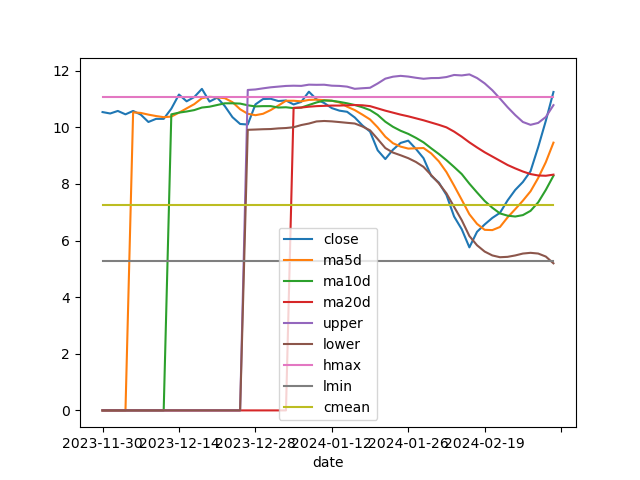

In [70]:
code
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [71]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2024-03-01,25.3,27.3,27.4,17.1,22.3,30.3,1.3,1.3,1.3


In [72]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2024-03-01,10.0,10.0,10.0,4.7,3.6,5.0,6.3,2.6,3.5
